# Time series and Forecasting

# Analysis of time series: detection of outliers

- There are methods that can be used to detect the outliers in a time series: Confidence interval method, Student test, etc.

## Confidence interval method:
- Principle:
  - Calculate the mean of the time series: 
    $$ \bar{x} = \frac{1}{n} \sum_{t=1}^{n} x_t $$
  - Calculate the standard deviation:
    $$ \sigma_x = \sqrt{\frac{1}{n-1} \sum_{t=1}^{n} (x_t - \bar{x})^2} $$
  - Calculate the confidence interval:
    $$ IC = \bar{x} \pm 1.96\sigma_x $$
  - An outlier is an observation outside the confidence interval

- NB: 1.96 is the value of the Normal distribution at 5% of risk


In [1]:
import numpy as np

# Given data
demands = np.array([28, 37, 29, 32, 49, 38, 29, 36, 21, 35, 14, 31])

# Calculate mean and standard deviation
mean_demand = np.mean(demands)
std_demand = np.std(demands, ddof=1)  # ddof=1 for sample standard deviation

# Calculate the confidence interval with a 95% confidence level
# For a normal distribution, the z-score for a 95% confidence level is 1.96
z_score = 1.96
confidence_interval = (mean_demand - z_score * std_demand, mean_demand + z_score * std_demand)

# Find outliers
outliers = demands[(demands < confidence_interval[0]) | (demands > confidence_interval[1])]

mean_demand, std_demand, confidence_interval, outliers

(31.583333333333332,
 8.805559538602802,
 (14.324436637671841, 48.84223002899482),
 array([49, 14]))

In [2]:
import pandas as pd

# Create a DataFrame for the time series data
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_demands = pd.DataFrame({
    'Time': months,
    'Demand': demands
})

# Add a column to indicate whether a demand value is an outlier
df_demands['Outlier'] = (df_demands['Demand'] < confidence_interval[0]) | (df_demands['Demand'] > confidence_interval[1])

# Create a summary DataFrame for the calculated statistics
df_summary = pd.DataFrame({
    'Statistic': ['Mean', 'Standard Deviation', 'Confidence Interval Lower', 'Confidence Interval Upper'],
    'Value': [mean_demand, std_demand, confidence_interval[0], confidence_interval[1]]
})

#df_demands
df_summary

,Statistic,Value
0,Mean,31.583333
1,Standard Deviation,8.805560
2,Confidence Interval Lower,14.324437
3,Confidence Interval Upper,48.842230


# Errors metrics
## Mean Forecast Error (MFE or Bias)

The Mean Forecast Error (MFE) is calculated as follows:

$$ MFE = \frac{1}{n} \sum_{t=1}^{n} (D_t - F_t) $$

- Also called forecast **BIAS**
- Want MFE to be as close to zero as possible -- minimum bias
- A large positive (negative) MFE means that the forecast is undershooting (overshooting) the actual observations
- Note that zero MFE *does not imply* that forecasts are perfect (no error) - only that mean is “on target”

## Mean Absolute Deviation (MAD)

The Mean Absolute Deviation (MAD) is calculated as follows:

$$ MAD = \frac{1}{n} \sum_{t=1}^{n} |D_t - F_t| $$

- Measures absolute error
- Positive and negative errors thus do not cancel out (as with MFE)
- Want MAD to be as small as possible
- No way to know if MAD error is large or small in relation to the actual data

## Mean Absolute Percentage Error (MAPE)

The Mean Absolute Percentage Error (MAPE) is calculated as follows:

$$ MAPE = \frac{100}{n} \sum_{t=1}^{n} \left| \frac{D_t - F_t}{D_t} \right| $$

- Same as MAD, except ...
- Measures deviation as a percentage of actual data

## Mean Squared Error (MSE)

The Mean Squared Error (MSE) is calculated as follows:

$$ MSE = \frac{1}{n} \sum_{t=1}^{n} (D_t - F_t)^2 $$

- Measures squared forecast error - error variance
- Recognizes that large errors are disproportionately more “expensive” than small errors
- But is not as easily interpreted as MAD, MAPE - not as intuitive



### Analysis of a temporal series Example: 
Forecasting Performance

| Month (t) | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  | 10 |
|-----------|----|----|----|----|----|----|----|----|----|----|
| Forecast (F_t) | 10 | 13 | 18 | 15 | 17 | 22 | 20 | 21 | 17 | 18 |
| Actual Demand (D_t) | 11 | 12 | 15 | 17 | 18 | 21 | 23 | 20 | 16 | 19 |


In [5]:
# Forecast and actual demand data
forecast = np.array([10, 13, 18, 15, 17, 22, 20, 21, 17, 18])
actual_demand = np.array([11, 12, 15, 17, 18, 21, 23, 20, 16, 19])

# Calculate performance metrics
mfe = np.mean(actual_demand - forecast)
mad = np.mean(np.abs(actual_demand - forecast))
mape = np.mean(np.abs((actual_demand - forecast) / actual_demand)) * 100
mse = np.mean((actual_demand - forecast) ** 2)

# Organize metrics in a DataFrame
performance_metrics = pd.DataFrame({
    'Metric': ['Mean Forecast Error (MFE)', 'Mean Absolute Deviation (MAD)', 
               'Mean Absolute Percentage Error (MAPE)', 'Mean Squared Error (MSE)'],
    'Value': [mfe, mad, mape, mse]
})

performance_metrics


,Metric,Value
0,Mean Forecast Error (MFE),0.100000
1,Mean Absolute Deviation (MAD),1.500000
2,Mean Absolute Percentage Error (MAPE),8.906304
3,Mean Squared Error (MSE),2.900000


# When to use extrapolation and causal methods

- **Situation where future demand has strong enough similarity with historical data**
  - **Yes** ➔ Use extrapolation methods
  - **No**
    - **Situation where the variable to be forecasted has a strong enough link with one more variables whose future values are known or easier to forecast**
      - **Yes** ➔ Use causal methods
      - **No** ➔ Rely on qualitative methods


# Causal Methods

Causal methods are based on a known or perceived relationship between the factor to be forecast and other external or internal factors

Knowledge of variables used in forecast development:
- Quantity to be forecast is the dependant variable
- Other variables are independent

Simple linear regression assumes a linear relationship exists between the dependent variable \( y \), and a single independent \( x \). The relationship may be expressed as 

$$ y = a \times x + b $$

To forecast future values of \( y \), values of \( a \), \( b \) are estimated based on previously acquired data

# Extrapolative Methods

They do not take into account the external factors but they look at a series of past values to predict what will happen in the future.

There are many different kinds of extrapolative methods:
- Naïve method
- Simple average
- Moving average
- Weighted moving average
- Exponential smoothing



# Linear regression methods

- Coefficients of the regression line:
  $$a = \frac{\sum_{t=1}^{n} (y_t - \bar{y})(x_t - \bar{x})}{\sum_{t=1}^{n} (x_t - \bar{x})^2}$$
  and 
  $$b = \bar{y} - a\bar{x}$$

- These parameters can be obtained by using Excel

- Correlation coefficient (R²):
  $$R^2 = 1 - \frac{Var(\text{forecast errors})}{Var(\text{actual sales})}$$

- For a good regression model, this coefficient should be close to 1


In [3]:
from sklearn.linear_model import LinearRegression

# Historical data
advertising_budget = np.array([15, 17.5, 12, 8.5, 9.5, 12.5, 14.5, 11]).reshape(-1, 1)
sales = np.array([153, 198, 147, 104, 131, 159, 160, 124])

# Create and fit the model
model = LinearRegression()
model.fit(advertising_budget, sales)

# Future advertising budgets (for quarters 9, 10, 11, 12)
future_budget = np.array([12.0, 17.0, 20.0, 14.0]).reshape(-1, 1)

# Predict the sales
predicted_sales = model.predict(future_budget)
predicted_sales


array([142.06278027, 185.94917788, 212.28101644, 159.61733931])

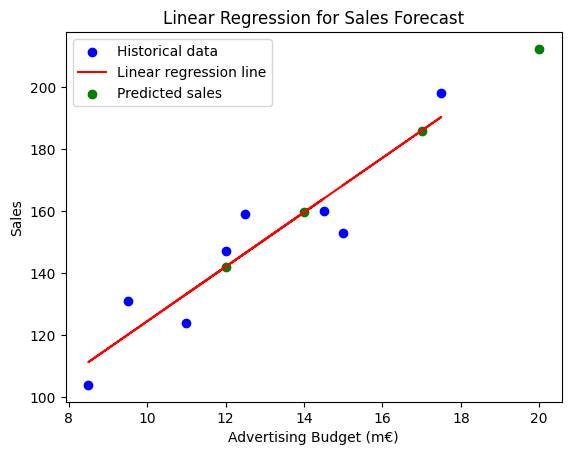

In [4]:
import matplotlib.pyplot as plt

# Plot the historical data
plt.scatter(advertising_budget, sales, color='blue', label='Historical data')

# Plot the linear regression line
plt.plot(advertising_budget, model.predict(advertising_budget), color='red', label='Linear regression line')

# Plot the future data points
plt.scatter(future_budget, predicted_sales, color='green', label='Predicted sales')

# Adding title and labels
plt.title('Linear Regression for Sales Forecast')
plt.xlabel('Advertising Budget (m€)')
plt.ylabel('Sales')
plt.legend()

# Show plot
plt.show()


# Moving Averages (of order n)

Historical data from past \( n \) time periods are used to forecast future activity

$$
F_t = \frac{D_{t-1} + D_{t-2} + D_{t-3} + \ldots + D_{t-n}}{n}
$$



Where:
- \( D_t \): Actual demand at time \( t \)
- \( F_t \): Forecast at time \( t \)


In [7]:
# Given demand data
demand_data = [45, 38, 29, 35, 31, 30]

# Calculate the moving averages of order 3
moving_averages = [np.nan] * 2  # The first two values are NA (not available)
moving_averages.extend(np.convolve(demand_data, np.ones(3)/3, mode='valid'))

# Create a DataFrame to hold the results
months = ['January', 'February', 'March', 'April', 'May', 'June']
df_moving_averages = pd.DataFrame({
    'Month': months,
    'Demand': demand_data,
    'Moving Average (n=3)': moving_averages
})

df_moving_averages


,Month,Demand,Moving Average (n=3)
0,January,45,NaN
1,February,38,NaN
2,March,29,37.333333
3,April,35,34.000000
4,May,31,31.666667
5,June,30,32.000000


# Weighted Moving Averages

---

Weighted moving average models apply

- Weighting to period data.
- Considers
- Some periods more important than others.

$$
F_t = w_{t-1}D_{t-1} + w_{t-2}D_{t-2} + w_{t-3}D_{t-3} + \ldots + w_{t-n}D_{t-n}
$$


In [8]:
# Given demand data and weights for the weighted moving average
demand_data = [45, 38, 29, 35, 31]
weights = np.array([0.25, 0.25, 0.5])

# Calculate the weighted moving averages of order 3, assuming the weights are in reverse chronological order
weighted_moving_averages = [np.nan, np.nan]  # The first two values are NA (not available)

# Compute the weighted moving averages
for i in range(2, len(demand_data)):
    weighted_avg = np.dot(demand_data[i-2:i+1], weights[::-1])  # Multiply the weights in reverse order
    weighted_moving_averages.append(weighted_avg)

# Append NA for June as we don't have demand data for this month
weighted_moving_averages.append(np.nan)

# Create a DataFrame to hold the results
months = ['January', 'February', 'March', 'April', 'May', 'June']
df_weighted_moving_averages = pd.DataFrame({
    'Month': months,
    'Demand': demand_data + [np.nan],  # Append NaN for June's demand
    'Weighted Moving Average (n=3)': weighted_moving_averages
})

df_weighted_moving_averages


,Month,Demand,Weighted Moving Average (n=3)
0,January,45.0,NaN
1,February,38.0,NaN
2,March,29.0,39.25
3,April,35.0,35.00
4,May,31.0,31.00
5,June,NaN,NaN


# Single Exponential Smoothing

---

- Models are developed using a single weighting or smoothing factor, named alpha (α)
- 0 < &alpha; < 1
- The mathematical model is:

$$
F_t = \alpha D_{t-1} + (1 - \alpha) F_{t-1}
$$

Where:

- \( F_t \) = Forecast at time \( t \)
- \( D_t \) = Actual demand at time \( t \)
- &alpha; = smoothing constant


In [42]:
# Given demand data, initial forecast, and smoothing constant alpha
demand_data = [45, 38, 29, 35, 31, 30]
initial_forecast = 37.33
alpha = 0.1

# Initialize the forecast list with the initial forecast
forecasts = [initial_forecast]

# Calculate the forecasts using exponential smoothing
for i in range(1, len(demand_data)):
    # Exponential smoothing formula: Ft = alpha * Dt-1 + (1 - alpha) * Ft-1
    new_forecast = alpha * demand_data[i-1] + (1 - alpha) * forecasts[-1]
    forecasts.append(new_forecast)

# Create a DataFrame to hold the results
months = ['January', 'February', 'March', 'April', 'May', 'June']
df_exponential_smoothing = pd.DataFrame({
    'Month': months,
    'Demand': demand_data,
    'Forecast': forecasts
})

df_exponential_smoothing


,Month,Demand,Forecast
0,January,45,37.330000
1,February,38,38.097000
2,March,29,38.087300
3,April,35,37.178570
4,May,31,36.960713
5,June,30,36.364642


# Exponential smoothing with Trend (Holt's Model)

Holt's Algorithm at any time period \( t \):

- Calculate the adjusted forecast at period $$\ t-1 $$ (initialisation):
  
$$\hat{F}_{t-1} = B_{t-1} + T_{t-1}$$


- Smooth the *base* forecast by taking into account the adjusted trend:
  
$$\ B_t = \alpha D_{t-1} + (1 - \alpha) (B_{t-1} + T_{t-1}) = \alpha D_{t-1} + (1 - \alpha) \hat{F}_{t-1} \$$

- Smooth the *trend*:
  
$$\ T_t = \beta (B_t - B_{t-1}) + (1 - \beta) T_{t-1} \$$

- Finally, calculate the adjusted forecast at period \( t \) or \( t + k \) as follows:
  
$$\ \hat{F}_t = B_t + T_t \$$
$$\ \hat{F}_{t+k} = B_t + (k + 1) \cdot T_t \$$


In [40]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Data from the image (as much as is shown)
data = {
    'Month': ['Dec', 'Jan', 'Feb', 'Mar'],
    'Demand': [1020, 940, 920, 950],
    'Base': [1020, 1020, 956, 920.8],
    'Trend': [0, 0, -32, -33.6],
    'F': [1020, 1020, 924, 887.2]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Assuming alpha and beta values for Holt's Exponential Smoothing
# Usually these would be optimized based on historical data
alpha = 0.8
beta = 0.2

# Initialize the Holt's model
model = ExponentialSmoothing(df['Demand'], trend='add', initialization_method="estimated")
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta)

# Forecast the next 3 months (April, May, June)
forecast = model_fit.forecast(3)

# Incorporate the forecasted values into the DataFrame
df_forecast = pd.DataFrame({
    'Month': ['Apr', 'May', 'June'],
    'Demand': forecast.round(1),  # Assuming we have no actual demand values for future months
    'Base': None,
    'Trend': None,
    'F': forecast.round(1)
})

# Append the forecasted values
#df = df.append(df_forecast, ignore_index=True)

df_forecast


,Month,Demand,Base,Trend,F
4,Apr,916.2,None,None,916.2
5,May,894.6,None,None,894.6
6,June,873.1,None,None,873.1


# Exponential Smoothing with Trend and Seasonality (Holt-Winters Model)

- Principle of the method: separate the *Base*, the *Trend* and the *Seasonality* and smooth them separately
- Three smoothing coefficients: $ \alpha $, $ \beta $, and $ \gamma $
- Equations:

$$ B_t = \alpha \frac{D_{t-1}}{S_{t-m}} + (1 - \alpha)(B_{t-1} + T_{t-1}) $$

$$ T_t = \beta (B_t - B_{t-1}) + (1 - \beta) T_{t-1} $$

$$ S_t = \gamma \frac{D_t}{B_t} + (1 - \gamma) S_{t-m} $$

- Adjusted Forecast at time period \( t + k \):

$$ \hat{F}_t = (B_t + T_t) S_{t-m} $$

$$ \hat{F}_{t+k} = [B_t + (k+1)T_t] S_{t+k-m} $$


# Holt-Winters Model Algorithm at time period \( t \)

- Algorithm at time period \( t \):
  - Initialization of the seasonality
    The seasonal coefficients in the first time periods (t=1..m) can be estimated as: the demand at \( t (D_t) \) divided by the average of the \( m \) first demands \( (\overline{D}) \):

    $$ S_t = \frac{D_t}{\overline{D}} \quad \text{for } t=1..m $$

  - Initialization of the trend \( (T_{t-1}) \) and the base \( (B_{t-1}) \)
  - Calculation of \( B_t \), \( T_t \), \( S_t \)
  - Calculation of the adjusted forecast at time period \( t \) is:

    $$ \hat{F}_t = (B_t + T_t)S_{t-m} $$


In [ ]:
import numpy as np

# Given data
months = np.arange(1, 8)
demand = np.array([990, 970, 1010, 1020, 980, 960, 1000])
alpha, beta, gamma = 0.8, 0.5, 0.2
m = 3  # Seasonality period

# Initialize base, trend, and seasonality
base = np.array([None] * len(demand))
trend = np.array([None] * len(demand))
seasonality = np.array([None] * len(demand))
forecast = np.array([None] * len(demand))

# Initializing the base and trend
base[2] = demand[2]
trend[2] = 0  # Given in the problem statement

# Calculate initial seasonality indices
# We assume that the seasonality of the first 3 months is the same
# as the seasonality of the last 3 months (cycle repeats)
# Therefore, we can use the average demand of the first three months to estimate it
initial_seasonality_indices = demand[:m] / np.mean(demand[:m])

# Initialize seasonality for the first three months
seasonality[:m] = initial_seasonality_indices

# Perform Holt-Winters calculations for months 4-7
for i in range(3, len(demand)):
    if i == 3:  # For month 4, we can't update the base and trend yet as we need the previous seasonality index
        forecast[i] = (base[i-1] + trend[i-1]) * seasonality[i - m]
    else:
        # Update base and trend using Holt-Winters formula
        base[i] = alpha * (demand[i] / seasonality[i - m]) + (1 - alpha) * (base[i - 1] + trend[i - 1])
        trend[i] = beta * (base[i] - base[i - 1]) + (1 - beta) * trend[i - 1]
        seasonality[i] = gamma * (demand[i] / base[i]) + (1 - gamma) * seasonality[i - m]
        forecast[i] = (base[i] + trend[i]) * seasonality[i - m]

# Since we don't have demand for month 8, we cannot calculate the seasonality for month 7
# We will use the seasonality from the same season of the previous cycle (month 4)
seasonality[6] = seasonality[6 - m]

# Forecast for month 7
forecast[6] = (base[5] + trend[5]) * seasonality[6]

# Display the filled in table
base, trend, seasonality, forecast


# General Examples

In [21]:
import numpy as np

# Sales history of Product A over 15 periods
sales_product_a = np.array([50, 70, 90, 30, 40, 30, 50, 60, 70, 60, 40, 40, 40, 50])
# Sales history of Product B over 15 periods
sales_product_b = np.array([50, 70, 90, 80, 90, 110, 130, 120, 140, 150, 170, 180, 150, 190, 220])

# Calculate the naive forecast for period 6
naive_forecast_period_6 = sales_product_a[4]  # The sale of period 5

# Calculate the Moving Average for 3 periods
moving_average_3_periods = [np.mean(sales_product_a[i-3:i]) for i in range(3, len(sales_product_a))]

# Calculate the Moving Average for 5 periods
moving_average_5_periods = [np.mean(sales_product_a[i-5:i]) for i in range(5, len(sales_product_a))]

naive_forecast_period_6, moving_average_3_periods, moving_average_5_periods



(40,
 [70.0,
  63.333333333333336,
  53.333333333333336,
  33.333333333333336,
  40.0,
  46.666666666666664,
  60.0,
  63.333333333333336,
  56.666666666666664,
  46.666666666666664,
  40.0],
 [56.0, 52.0, 48.0, 42.0, 50.0, 54.0, 56.0, 54.0, 50.0])

In [17]:
# Initialize the exponential smoothing forecasts
alpha_01 = 0.1
alpha_05 = 0.5

# Initial smoothed value is the average of the first five periods
initial_smoothed_value = sales_product_a[:5].mean()

# Initialize the lists to hold the forecasts
exp_smoothing_forecasts_01 = [initial_smoothed_value]
exp_smoothing_forecasts_05 = [initial_smoothed_value]

# Calculate the exponential smoothing forecasts
for sale in sales_product_a[5:]:  # Start from period 6
    new_forecast_01 = alpha_01 * sale + (1 - alpha_01) * exp_smoothing_forecasts_01[-1]
    new_forecast_05 = alpha_05 * sale + (1 - alpha_05) * exp_smoothing_forecasts_05[-1]
    exp_smoothing_forecasts_01.append(new_forecast_01)
    exp_smoothing_forecasts_05.append(new_forecast_05)

# Remove the initial average value used for initialization from the forecasts
exp_smoothing_forecasts_01.pop(0)
exp_smoothing_forecasts_05.pop(0)

56.0

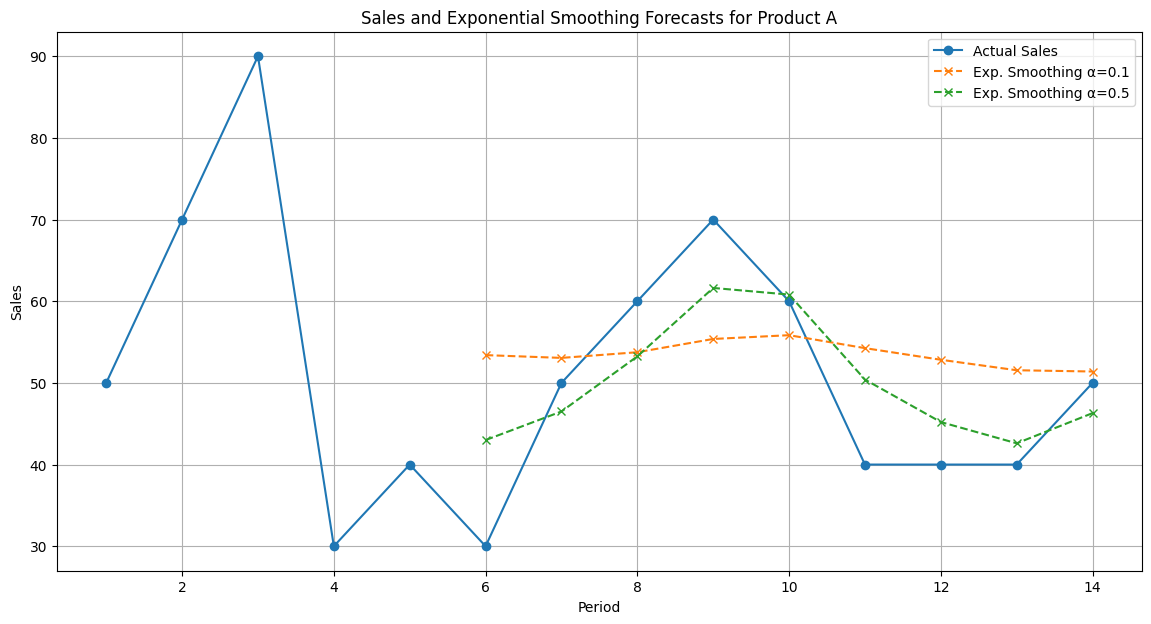

In [18]:
# Adjust the periods for the x-axis to match the sales data
adjusted_periods = list(range(1, 15))

# Plot the sales and forecasts with the correct period range
plt.figure(figsize=(14, 7))
plt.plot(adjusted_periods, sales_product_a, marker='o', label='Actual Sales')

# Plot the forecasts starting from period 6 to 14
plt.plot(adjusted_periods[5:], exp_smoothing_forecasts_01, marker='x', linestyle='--', label='Exp. Smoothing α=0.1')
plt.plot(adjusted_periods[5:], exp_smoothing_forecasts_05, marker='x', linestyle='--', label='Exp. Smoothing α=0.5')

# Add titles and labels
plt.title('Sales and Exponential Smoothing Forecasts for Product A')
plt.xlabel('Period')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [19]:
exp_smoothing_forecasts_01, exp_smoothing_forecasts_05

([53.4,
  53.06,
  53.754000000000005,
  55.378600000000006,
  55.840740000000004,
  54.256666,
  52.8309994,
  51.547899460000004,
  51.393109514],
 [43.0,
  46.5,
  53.25,
  61.625,
  60.8125,
  50.40625,
  45.203125,
  42.6015625,
  46.30078125])

In [33]:
# Calculate the naive forecast for all periods after the first one
naive_forecast_b = sales_product_b[:-1]

# Calculate the Moving Average for 3 periods for Product B
moving_average_3_periods_b = [np.mean(sales_product_b[i-3:i]) for i in range(3, len(sales_product_b))]

# Calculate the Moving Average for 5 periods for Product B
moving_average_5_periods_b = [np.mean(sales_product_b[i-5:i]) for i in range(5, len(sales_product_b))]

naive_forecast_b, moving_average_3_periods_b, moving_average_5_periods_b

(array([ 50,  70,  90,  80,  90, 110, 130, 120, 140, 150, 170, 180, 150,
        190]),
 [70.0,
  80.0,
  86.66666666666667,
  93.33333333333333,
  110.0,
  120.0,
  130.0,
  136.66666666666666,
  153.33333333333334,
  166.66666666666666,
  166.66666666666666,
  173.33333333333334],
 [76.0, 88.0, 100.0, 106.0, 118.0, 130.0, 142.0, 152.0, 158.0, 168.0])

In [34]:
# Initialize the exponential smoothing forecasts
alpha_01 = 0.1
alpha_05 = 0.5

# Initial smoothed value is the average of the first five periods
initial_smoothed_value = sales_product_b[:5].mean()

# Initialize the lists to hold the forecasts
exp_smoothing_forecasts_01 = [initial_smoothed_value]
exp_smoothing_forecasts_05 = [initial_smoothed_value]

# Calculate the exponential smoothing forecasts
for sale in sales_product_b[5:]:  # Start from period 6
    new_forecast_01 = alpha_01 * sale + (1 - alpha_01) * exp_smoothing_forecasts_01[-1]
    new_forecast_05 = alpha_05 * sale + (1 - alpha_05) * exp_smoothing_forecasts_05[-1]
    exp_smoothing_forecasts_01.append(new_forecast_01)
    exp_smoothing_forecasts_05.append(new_forecast_05)

# Remove the initial average value used for initialization from the forecasts
exp_smoothing_forecasts_01.pop(0)
exp_smoothing_forecasts_05.pop(0)

76.0

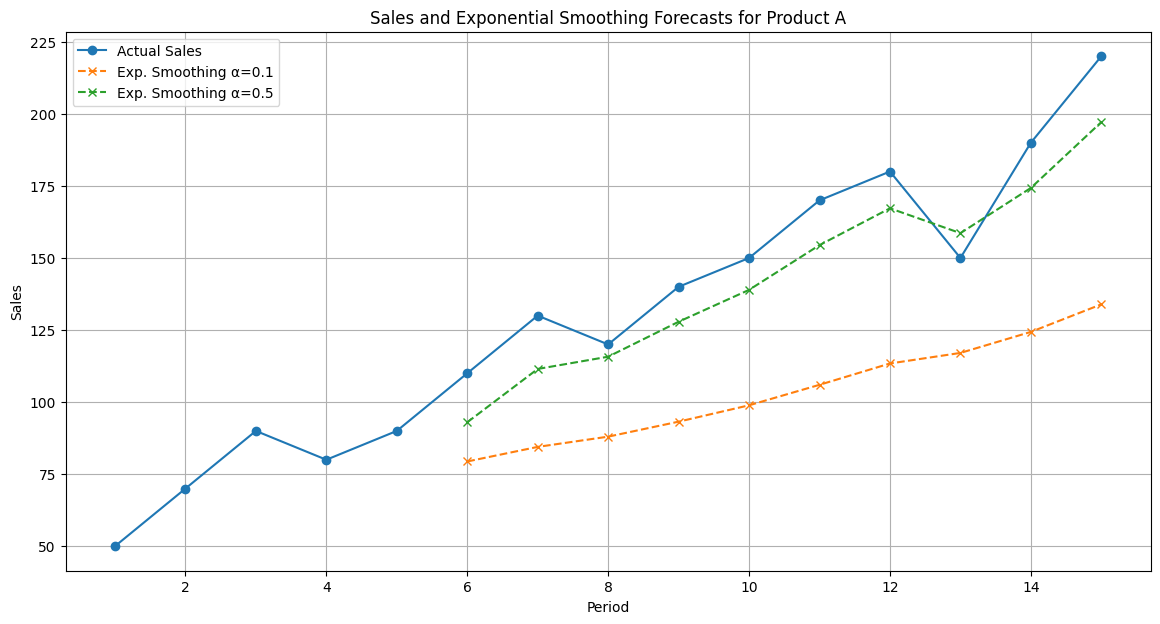

In [35]:
# Adjust the periods for the x-axis to match the sales data
adjusted_periods = list(range(1, 16))

# Plot the sales and forecasts with the correct period range
plt.figure(figsize=(14, 7))
plt.plot(adjusted_periods, sales_product_b, marker='o', label='Actual Sales')

# Plot the forecasts starting from period 6 to 14
plt.plot(adjusted_periods[5:], exp_smoothing_forecasts_01, marker='x', linestyle='--', label='Exp. Smoothing α=0.1')
plt.plot(adjusted_periods[5:], exp_smoothing_forecasts_05, marker='x', linestyle='--', label='Exp. Smoothing α=0.5')

# Add titles and labels
plt.title('Sales and Exponential Smoothing Forecasts for Product A')
plt.xlabel('Period')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [38]:
import numpy as np
import pandas as pd

# Sales history of Product B over 15 periods
sales_product_b = np.array([50, 70, 90, 80, 90, 110, 130, 120, 140, 150, 170, 180, 150, 190, 220])

# Initialize the trend as one-quarter of the difference between the demand in period 5 and the demand in period 1
trend_init = (sales_product_b[4] - sales_product_b[0]) / 4

# Initialize the exponential smoothing forecasts
alpha_01 = 0.1
alpha_05 = 0.5
trend_coef = 0.2

# Initial smoothed value is the demand in period 1
initial_smoothed_value = sales_product_b[0]

# Initialize the lists to hold the forecasts
exp_smoothing_forecasts_01 = [initial_smoothed_value]
exp_smoothing_forecasts_05 = [initial_smoothed_value + trend_init]

# Calculate the exponential smoothing forecasts
for i in range(1, len(sales_product_b)):
    smoothed_01 = alpha_01 * sales_product_b[i] + (1 - alpha_01) * (exp_smoothing_forecasts_01[i - 1] + trend_init)
    trend_init = trend_coef * (smoothed_01 - exp_smoothing_forecasts_01[i - 1]) + (1 - trend_coef) * trend_init
    exp_smoothing_forecasts_01.append(smoothed_01)
    
    smoothed_05 = alpha_05 * sales_product_b[i] + (1 - alpha_05) * (exp_smoothing_forecasts_05[i - 1] + trend_init)
    trend_init = trend_coef * (smoothed_05 - exp_smoothing_forecasts_05[i - 1]) + (1 - trend_coef) * trend_init
    exp_smoothing_forecasts_05.append(smoothed_05)

# Calculate the mean forecasting error for each model
forecast_errors_01 = sales_product_b[1:] - exp_smoothing_forecasts_01[:-1]
forecast_errors_05 = sales_product_b[1:] - exp_smoothing_forecasts_05[:-1]
mean_forecast_error_01 = np.mean(forecast_errors_01)
mean_forecast_error_05 = np.mean(forecast_errors_05)

# Print the mean forecasting errors
print("Mean Forecasting Error for Exponential Smoothing (α=0.1):", mean_forecast_error_01)
print("Mean Forecasting Error for Exponential Smoothing (α=0.5):", mean_forecast_error_05)

# Create a DataFrame with error measures
data = {
    "Period": np.arange(2, 16),
    "Sales": sales_product_b[1:],
    "Exp. Smoothing (α=0.1)": exp_smoothing_forecasts_01[:-1],
    "Exp. Smoothing (α=0.5)": exp_smoothing_forecasts_05[:-1],
    "Forecast Error (α=0.1)": forecast_errors_01,
    "Forecast Error (α=0.5)": forecast_errors_05
}
error_df = pd.DataFrame(data)

# Display the DataFrame
print("\nError Measures DataFrame:")
print(error_df)


Mean Forecasting Error for Exponential Smoothing (α=0.1): 14.877124847903364
Mean Forecasting Error for Exponential Smoothing (α=0.5): 10.70296077712452

Error Measures DataFrame:
    Period  Sales  Exp. Smoothing (α=0.1)  Exp. Smoothing (α=0.5)  \
0        2     70               50.000000               60.000000   
1        3     90               61.000000               70.100000   
2        4     80               73.062000               85.328200   
3        5     90               84.097484               88.363952   
4        6    110               93.441958               94.007189   
5        7    130              103.061852              106.505179   
6        8    120              114.487587              123.276017   
7        9    140              125.291314              127.275041   
8       10    150              135.599335              138.595946   
9       11    170              146.217296              149.438833   
10      12    180              157.950125              165.05

# Handling of seasonality: two approaches

- **Handling of seasonality**
  - Direct approach: explicit handling of the seasonality inside the extrapolation method
    - Holt Winters method = Triple exponential smoothing method handling trend and seasonality
  - Indirect approach: handling seasonality out of the extrapolation method
    - Use a 3 steps approach
      - Deseasonalize
      - Extrapolate
      - Re seasonalize


# Quantitative Methods: Advantages and drawbacks

### Advantages:
- They are quick to use if the model is already developed
- The data gathering does not require a high cost since the historical data are often stored in the information systems

### Drawbacks:
- They don't take into account the new effects:

> "Manage a company by only considering the time series methods in forecasting is like driving a car by only looking at the rearview mirror"

### For mid term and short term decisions, most companies use a forecasting approach that relies on quantitative methods (mainly extrapolation methods) adjusted by knowledge of marketing/sales

- Quantitative approaches
  - Extrapolation methods
  - Causal methods

\+

- Qualitative approaches
  - Expert judgment

⇒

- Marketing/Sales


# Qualitative Methods: Advantages & drawbacks

### Advantages:
- Take into account intangible factors.
- Used when there is little demand information (new product, new market, etc.)

### Drawbacks:
- Long delay of the process
- Bias/subjectivity
- High cost (ex. Experts consulting)
- Not enough precision


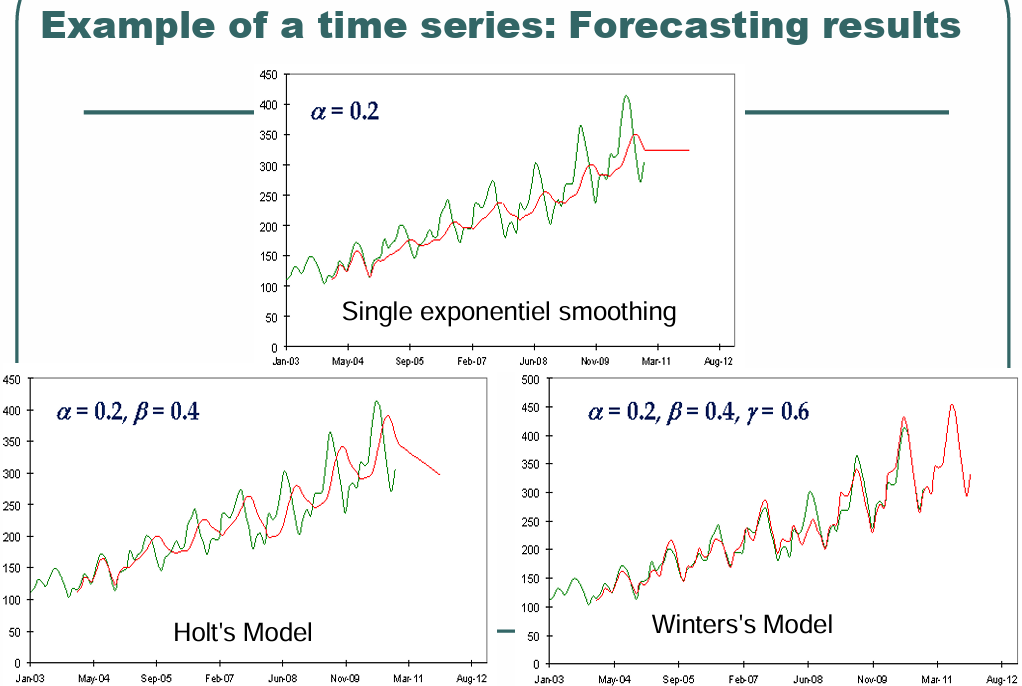